C:\soft\Anaconda2\lib\site-packages\sklearn\svm\base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


[[ 1.00052254  0.99964466  1.00032962 -0.09843092 -0.13440961 -0.0433722 ]
 [ 1.00006594  0.99998098  1.00003894 -0.0714557  -0.00385456  0.04558936]
 [-1.00029424 -0.13440961 -0.09843092  1.00032962  0.99964466  0.04346801]
 [-1.00029424 -0.00385456 -0.0714557   1.00003894  0.99998098 -0.04554919]
 [ 0.04346801 -0.99960664  0.13446871 -1.0004075   0.09824069  1.00052254]
 [-0.04554919 -1.00001901  0.00382623 -0.99996105  0.071314    1.00006594]
 [-0.0433722   0.09824069 -1.0004075   0.13446871 -0.99960664 -1.00029424]
 [ 0.04558936  0.071314   -0.99996105  0.00382623 -1.00001901 -1.00029424]]
[0 0 1 1 2 2 3 3]


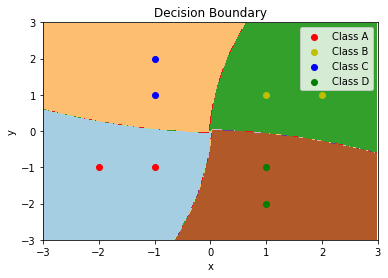

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
X = np.array([[-1,-1],[-2,-1],[1,1],[2,1],[-1,1],[-1,2],[1,-1],[1,-2]])
y = np.array([0,0,1,1,2,2,3,3])
# y=np.array([1,1,2,2,3,3,4,4])
# clf = SVC(decision_function_shape="ovr",probability=True)
clf = SVC(probability=True)
clf.fit(X, y)
print(clf.decision_function(X))
'''
对于n分类，会有n个分类器，然后，任意两个分类器都可以算出一个分类界面，这样，用decision_function()时，对于任意一个样例，就会有n*(n-1)/2个值。
任意两个分类器可以算出一个分类界面，然后这个值就是距离分类界面的距离。
我想，这个函数是为了统计画图，对于二分类时最明显，用来统计每个点离超平面有多远，为了在空间中直观的表示数据以及画超平面还有间隔平面等。
decision_function_shape="ovr"时是4个值，为ovo时是6个值。
'''
print(clf.predict(X))
clf.predict_proba(X) #这个是得分,每个分类器的得分，取最大得分对应的类。
#画图
plot_step=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #对坐标风格上的点进行预测，来画分界面。其实最终看到的类的分界线就是分界面的边界线。
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

class_names="ABCD"
plot_colors="rybg"
for i, n, c in zip(range(4), class_names, plot_colors):
    idx = np.where(y == i) #i为0或者1，两个类
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
X = np.array([['a',-1],[-2,-1],[1,1],[2,1],[-1,1],[-1,2],[1,-1],[1,-2]])
# y = np.array([0,0,1,1,2,2,3,3])
y = np.array(['e','e','b','b','c','c','d','d'])
# y=np.array([1,1,2,2,3,3,4,4])
# clf = SVC(decision_function_shape="ovr",probability=True)
clf = SVC(probability=True)
# clf = SVC()
clf.fit(X, y)
# print(clf.decision_function(X))
print(clf.predict(X))
clf.predict_proba(X) #这个是得分,每个分类器的得分，取最大得分对应的类。

ValueError: could not convert string to float: a

In [ ]:
import  numpy as np
list1=[1,2,3,'a']  
print list1  
  
a=np.array([1,2,3,4,5])  
b=np.array([[1,2,3],[4,5,6]])  
c=list(b)   # array到list的转换  
print type(c)
print a,np.shape(a)  
print b,b.shape
print c,c.shape  


 [1, 2, 3, 'a']
<type 'list'>
[1 2 3 4 5] (5L,)
[[1 2 3]
 [4 5 6]] (2L, 3L)
[1, 2, 3, 4, 5]

AttributeError: 'list' object has no attribute 'shape'